In [5]:
import pymongo
import pandas as pd
import base64
from PIL import Image
import io
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

In [7]:
timelines = pd.read_csv('timelines.csv')

In [8]:
demographies = pd.read_csv('demographies.csv')

In [10]:
timelines = timelines.dropna()

In [6]:
# myclient = pymongo.MongoClient("mongodb://localhost:27017/")
# db = myclient["recommendersystems"]
# emo = db["emotions"]

# x = emo.find_one()

# print(x)

In [11]:
emo = pd.read_csv('emotions.csv')
emo = emo.sort_values(by=['userId', 'timestamp'])
emo = emo.dropna()

In [12]:
emo.head()

,smile,innerBrowRaise,browRaise,browFurrow,noseWrinkle,upperLipRaise,lipCornerDepressor,chinRaise,lipPucker,lipPress,...,disgust,contempt,anger,fear,surprise,valence,engagement,timestamp,userId,_id
219105,0.000023,0.286420,0.324985,0.000130,0.043827,0.000022,0.000339,0.388137,0.003109,0.002685,...,0.427603,0.192674,0.001948,0.004508,0.197079,0.0,0.083111,1.623047e+12,Akarsha_12_Female,ObjectId(60bdbd2d75bcd134fe775760)
219107,0.001308,0.005566,0.290480,0.000741,0.265971,0.027669,0.000128,0.035873,0.001603,0.001879,...,0.479791,0.192659,0.001952,0.004343,0.200429,0.0,0.117863,1.623047e+12,Akarsha_12_Female,ObjectId(60bdbd2d75bcd134fe775761)
219106,0.000184,0.011433,0.138774,0.001032,0.209178,0.041469,0.002174,0.028054,0.001491,0.001221,...,0.443336,0.192675,0.001963,0.004485,0.195367,0.0,0.085559,1.623047e+12,Akarsha_12_Female,ObjectId(60bdbd2d75bcd134fe775762)
219108,0.000069,0.004591,0.061073,0.009487,21.571196,0.042780,0.003898,0.233027,0.009496,0.000315,...,2.915958,0.192707,0.001984,0.004514,0.193769,0.0,0.373818,1.623047e+12,Akarsha_12_Female,ObjectId(60bdbd2d75bcd134fe775763)
219110,0.000199,0.006848,0.219500,0.030979,4.126130,0.044266,0.019357,6.855668,0.012115,0.000771,...,0.628714,0.192783,0.002459,0.004506,0.194787,0.0,0.172907,1.623047e+12,Akarsha_12_Female,ObjectId(60bdbd2d75bcd134fe775764)


In [9]:
emo.columns

Index(['smile', 'innerBrowRaise', 'browRaise', 'browFurrow', 'noseWrinkle',
       'upperLipRaise', 'lipCornerDepressor', 'chinRaise', 'lipPucker',
       'lipPress', 'lipSuck', 'mouthOpen', 'smirk', 'eyeClosure', 'attention',
       'lidTighten', 'jawDrop', 'dimpler', 'eyeWiden', 'cheekRaise',
       'lipStretch', 'joy', 'sadness', 'disgust', 'contempt', 'anger', 'fear',
       'surprise', 'valence', 'engagement', 'timestamp', 'userId', '_id'],
      dtype='object')

In [13]:
def getRows(name):
    rows = emo.loc[emo['userId'] == name]
    

In [14]:
# 1 min ad duration for 32 seconds -> tikiri mari
# 3 min 45 seconds duration for 32 seconds -> boc
# 6 min 6 seconds duration for 32 seconds -> cream cracker
# 8 min 6 seconds duration for 32 seconds -> koththu mee

In [15]:
# function for save images
def saveImg(fileName, imgString):
#     print(imgString)
#     return
    image = base64.b64decode(imgString[22:])
    imagePath = ('images/' + fileName)
    img = Image.open(io.BytesIO(image))
    img.save(imagePath, 'png')

In [16]:
# iterate through demographies and save the images
# for i, row in demographies.iterrows():
#     images = json.loads(row['images'])
#     if(len(images) > 2):
#         saveImg(row['userId'] + '_' + str(1) + '.png', images[0]['data'])
#         saveImg(row['userId'] + '_' + str(2) + '.png', images[1]['data'])
# #     break
        
            

In [ ]:
# 1 min ad duration for 32 seconds -> tikiri mari => children, snacks
# 3 min 45 seconds duration for 32 seconds -> boc => elders, savings
# 6 min 6 seconds duration for 32 seconds -> cream cracker => youth, middle age, snacks
# 8 min 6 seconds duration for 32 seconds -> koththu mee => youth, food, snacks, fun

In [17]:
movieParts = pd.read_csv('adsAndMovie_without_na.csv')

In [13]:
movieParts.columns

Index(['Unnamed: 0', 'smile', 'innerBrowRaise', 'browRaise', 'browFurrow',
       'noseWrinkle', 'upperLipRaise', 'lipCornerDepressor', 'chinRaise',
       'lipPucker', 'lipPress', 'lipSuck', 'mouthOpen', 'smirk', 'eyeClosure',
       'attention', 'lidTighten', 'jawDrop', 'dimpler', 'eyeWiden',
       'cheekRaise', 'lipStretch', 'joy', 'sadness', 'disgust', 'contempt',
       'anger', 'fear', 'surprise', 'valence', 'engagement', 'timestamp',
       'userId', '_id', 'num', 'part'],
      dtype='object')

In [18]:
movieParts.loc[movieParts['userId'] == 'Lahiru_23_male']

,Unnamed: 0,smile,innerBrowRaise,browRaise,browFurrow,noseWrinkle,upperLipRaise,lipCornerDepressor,chinRaise,lipPucker,...,anger,fear,surprise,valence,engagement,timestamp,userId,_id,num,part
0,mean,0.944980,0.007321,12.931460,0.000247,0.001265,6.469341,2.508669,3.186199,0.403462,...,0.037459,0.076230,4.207244,-5.051303,15.784402,36.196418,Lahiru_23_male,NaN,1.0,M
1,mean,0.000223,0.001590,12.212350,0.000247,0.003044,0.917955,4.922062,6.981729,3.227182,...,0.390009,0.003132,4.062983,-7.817432,14.007696,82.014279,Lahiru_23_male,NaN,1.0,A
2,mean,0.585185,0.005256,12.794181,0.000236,0.001991,4.346483,3.189683,4.299268,1.393436,...,0.152735,0.048412,4.056534,-5.722758,14.642886,49.798928,Lahiru_23_male,NaN,2.0,M
3,mean,0.250589,0.252834,10.394885,0.007487,0.077309,2.349885,9.574063,3.080715,2.015270,...,0.088650,0.226062,3.796687,-7.349686,13.669061,115.964499,Lahiru_23_male,NaN,2.0,A
4,mean,0.224445,0.237248,11.080581,0.117665,0.073010,2.119239,12.559441,2.798391,1.913271,...,0.094116,0.202612,4.322070,-9.253248,15.385725,129.701614,Lahiru_23_male,NaN,3.0,M
5,mean,2.009563,0.185200,11.330839,0.084009,0.055128,2.136273,14.387203,2.673038,2.903360,...,0.076611,0.144169,3.665013,-8.220958,17.396636,184.123915,Lahiru_23_male,NaN,3.0,A
6,mean,6.595376,0.170446,10.475908,0.077316,0.051068,2.951739,13.332749,2.535868,2.673610,...,0.071339,0.132743,3.669115,-2.989107,22.005073,200.334350,Lahiru_23_male,NaN,4.0,M
7,mean,5.527062,0.170824,9.908801,0.064805,0.043436,2.566737,16.759428,2.217050,2.273058,...,0.062985,0.111668,3.218508,-5.853229,21.800915,240.565510,Lahiru_23_male,NaN,4.0,A


In [19]:
len(set(list(movieParts['userId'])))

77

In [20]:
# emotions => joy, sadness, disgust, contempt, anger, fear, surprise, valence, 
# compound feelings => engagement
# facial features => smile, innerBrowRaise, browRaise, browFurrow, noseWrinkle, upperLipRaise, lipcornerDepressor,
#                     chinRaise, attention, lidTighten, jawDrop, dimpler, eyeWiden, cheekraise, lipStrentch,

In [21]:
movieParts.loc[movieParts['userId'] == 'Kavindu__19_m']

,Unnamed: 0,smile,innerBrowRaise,browRaise,browFurrow,noseWrinkle,upperLipRaise,lipCornerDepressor,chinRaise,lipPucker,...,anger,fear,surprise,valence,engagement,timestamp,userId,_id,num,part
8,mean,0.000185,0.319007,6.998353,0.001138,0.674542,0.084816,0.046733,0.713155,4.945969,...,0.080026,0.007689,2.903018,-6.577463,19.246221,37.964057,Kavindu__19_m,NaN,1.0,M
9,mean,0.002921,0.073352,2.139370,0.000392,0.049952,0.000062,0.389043,1.708147,0.913682,...,0.065231,0.004226,0.523702,-2.471000,5.744845,83.650901,Kavindu__19_m,NaN,1.0,A
10,mean,0.001087,0.216695,4.936268,0.000922,0.422851,0.051089,0.158248,1.003444,3.284312,...,0.070103,0.006293,1.937645,-4.785826,13.578124,51.068849,Kavindu__19_m,NaN,2.0,M
11,mean,0.062620,0.630165,5.914644,0.023340,0.295892,0.021831,1.195718,4.034026,10.374758,...,0.214814,0.131591,1.620177,-6.955137,17.083415,117.537230,Kavindu__19_m,NaN,2.0,A
12,mean,0.915527,0.573557,8.255454,0.023003,0.268827,0.055385,1.074990,3.707468,12.903866,...,0.196061,0.117391,3.027437,-5.351784,22.595755,132.921146,Kavindu__19_m,NaN,3.0,M
13,mean,0.644131,0.491443,6.451533,0.017228,0.385417,0.038968,0.912979,2.765044,9.733340,...,0.142819,0.083972,2.311865,-4.290956,16.850744,187.996214,Kavindu__19_m,NaN,3.0,A
14,mean,0.601232,0.513519,6.740320,0.033288,0.424661,0.036857,1.299648,2.971253,11.184426,...,0.135610,0.078658,2.272716,-4.024977,17.257615,201.611946,Kavindu__19_m,NaN,4.0,M
15,mean,1.742424,0.477822,7.096407,0.027785,0.483938,0.030695,1.460800,3.778996,10.330821,...,0.117218,0.069286,2.640095,-2.960103,17.687075,245.601973,Kavindu__19_m,NaN,4.0,A


In [23]:
moviePartsWithAge = pd.read_csv('meanOfMovieWithAge.csv')

In [63]:
age1 = moviePartsWithAge.loc[moviePartsWithAge['age'] == 1]

In [64]:
userIds = set(list(age1['userId']))

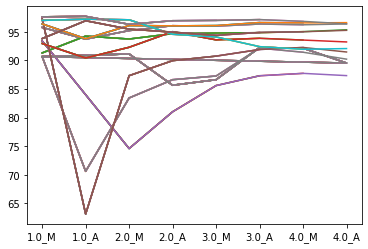

In [65]:
age0 = moviePartsWithAge.loc[moviePartsWithAge['age'] == 0]
userIds = set(list(age0['userId']))
for user in userIds:
    data = moviePartsWithAge.loc[moviePartsWithAge['userId'] == user]
    joy = []
    movie = []
#     fig, ax = plt.subplots()
    for i, row in data.iterrows():
        joy.append(row['attention'])
        movie.append(str(row['num']) + '_' + row['part'])
        plt.plot(movie, joy)
plt.show()

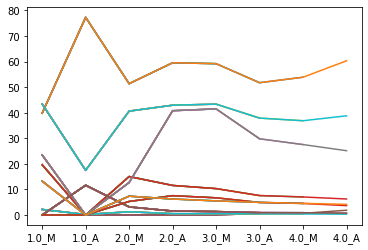

In [66]:
age2 = moviePartsWithAge.loc[moviePartsWithAge['age'] == 2]
userIds = set(list(age2['userId']))
for user in userIds:
    data = moviePartsWithAge.loc[moviePartsWithAge['userId'] == user]
    joy = []
    movie = []
#     fig, ax = plt.subplots()
    for i, row in data.iterrows():
        joy.append(row['joy'])
        movie.append(str(row['num']) + '_' + row['part'])
        plt.plot(movie, joy)
plt.show()

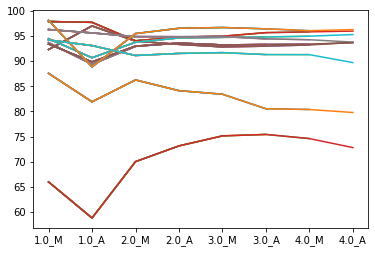

In [67]:
age2 = moviePartsWithAge.loc[moviePartsWithAge['age'] == 2]
userIds = set(list(age2['userId']))
for user in userIds:
    data = moviePartsWithAge.loc[moviePartsWithAge['userId'] == user]
    joy = []
    movie = []
#     fig, ax = plt.subplots()
    for i, row in data.iterrows():
        joy.append(row['attention'])
        movie.append(str(row['num']) + '_' + row['part'])
        plt.plot(movie, joy)
plt.show()

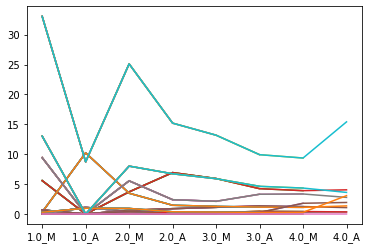

In [68]:
age3 = moviePartsWithAge.loc[moviePartsWithAge['age'] == 3]
userIds = set(list(age3['userId']))
for user in userIds:
    data = moviePartsWithAge.loc[moviePartsWithAge['userId'] == user]
    joy = []
    movie = []
#     fig, ax = plt.subplots()
    for i, row in data.iterrows():
        joy.append(row['joy'])
        movie.append(str(row['num']) + '_' + row['part'])
        plt.plot(movie, joy)
plt.show()

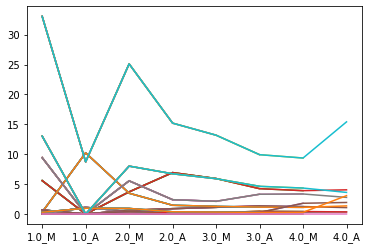

In [69]:
for user in userIds:
    data = moviePartsWithAge.loc[moviePartsWithAge['userId'] == user]
    joy = []
    movie = []
#     fig, ax = plt.subplots()
    for i, row in data.iterrows():
        joy.append(row['joy'])
        movie.append(str(row['num']) + '_' + row['part'])
        plt.plot(movie, joy)
plt.show()

In [97]:
parallel = pd.DataFrame(columns=movie)

In [86]:
movie.append('userId')

In [121]:
movieColumns=['1.0_M', '1.0_A', '2.0_M', '2.0_A', '3.0_M', '3.0_A', '4.0_M', '4.0_A', 'userId']

In [110]:
moviePartsWithAge.loc[moviePartsWithAge['userId'] == 'Sanuli_12_female']

,Unnamed: 0,Unnamed: 0.1,smile,innerBrowRaise,browRaise,browFurrow,noseWrinkle,upperLipRaise,lipCornerDepressor,chinRaise,...,anger,fear,surprise,valence,engagement,timestamp,userId,num,part,age
381,384,mean,0.004478,0.079214,0.180139,0.000048,0.019494,0.000014,0.000417,0.025454,...,0.001961,0.004533,0.196332,0.000000,0.081275,116.850000,Sanuli_12_female,1.0,M,0
382,386,mean,13.734286,0.415568,17.645684,0.000025,0.004537,0.004453,0.007019,13.826852,...,0.016012,13.042611,8.926007,7.985348,22.887005,23.976889,Sanuli_12_female,2.0,M,0
383,387,mean,8.241858,0.823882,12.009674,0.000128,0.152310,0.020304,0.004561,8.315151,...,0.020905,17.406558,5.593456,6.987423,13.964845,95.617533,Sanuli_12_female,2.0,A,0
384,388,mean,13.850502,0.635482,8.981869,0.000129,0.209174,0.013873,0.003249,6.430514,...,0.017806,14.194206,3.959048,12.832455,19.135790,160.695545,Sanuli_12_female,3.0,M,0
385,389,mean,13.516180,0.862464,11.728724,0.000136,0.177068,7.918318,0.030543,5.536649,...,0.019624,11.725825,5.803370,8.919461,24.969143,229.309125,Sanuli_12_female,3.0,A,0
386,390,mean,13.946766,0.815472,11.343597,0.000145,0.166685,7.494038,0.029669,6.155555,...,0.018719,11.160208,5.493380,9.203861,24.156518,241.788088,Sanuli_12_female,4.0,M,0
387,391,mean,19.034046,0.873652,12.015184,0.000148,0.227015,6.036607,0.884949,10.122209,...,0.016171,9.891993,5.748975,12.669437,29.463930,292.534372,Sanuli_12_female,4.0,A,0


In [162]:
def plotEmo(i, isParallel, emotion):
    age3 = moviePartsWithAge.loc[moviePartsWithAge['age'] == i]
    userIds = set(list(age3['userId']))
    allData = []
    for user in userIds:
        data = moviePartsWithAge.loc[moviePartsWithAge['userId'] == user]
#         print(len(data))
        if len(data) > 7:
            joy = []
            movie = []
#             print(len(data))
        #     fig, ax = plt.subplots()
            for i, row in data.iterrows():
                joy.append(row[emotion])
                movie.append(str(row['num']) + '_' + row['part'])
        #         plt.plot(movie, joy)
            dictionary = {
                movie[0]: joy[0],
                movie[1]: joy[1],
                movie[2]: joy[2],
                movie[3]: joy[3],
                movie[4]: joy[4],
                movie[5]: joy[5],
                movie[6]: joy[6],
                movie[7]: joy[7],
                'userId': user
            }
        #     print(dictionary)
            allData.append(dictionary)
#         movie.append('userId')
#     print(allData)
#     break
    parallel = pd.DataFrame(allData, columns=movieColumns)
#     print(parallel)
#     break
    if isParallel :
        plt.figure(figsize=(10, 6), dpi=80)
        parallel_coordinates(parallel, "userId");
    else:
#         parallel.mean().plot(kind='line')
        return allData

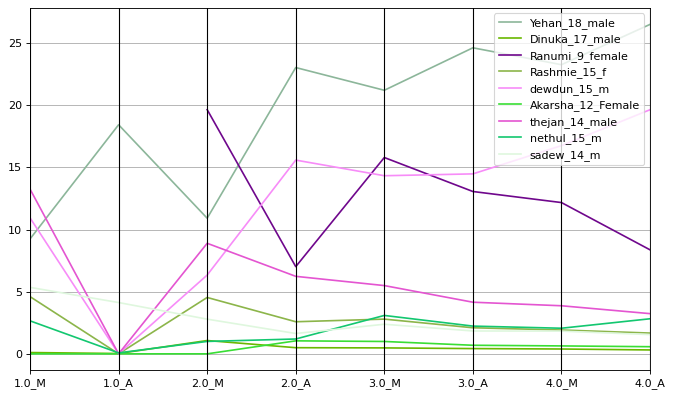

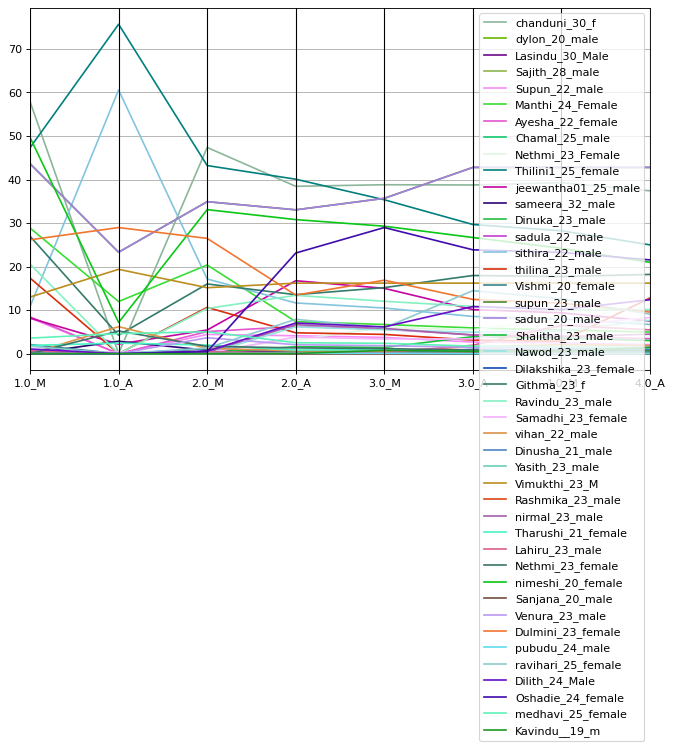

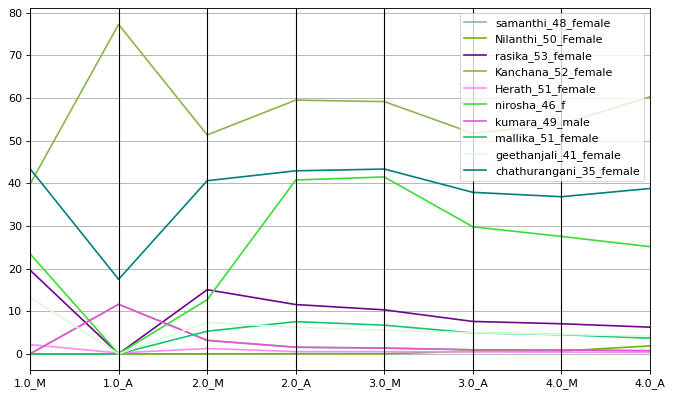

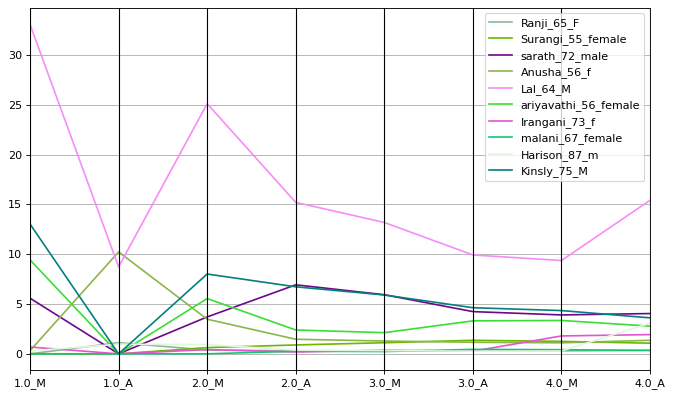

In [164]:
plotEmo(0, True, 'joy')
plotEmo(1, True, 'joy')
plotEmo(2, True, 'joy')
plotEmo(3, True, 'joy')


<AxesSubplot:>

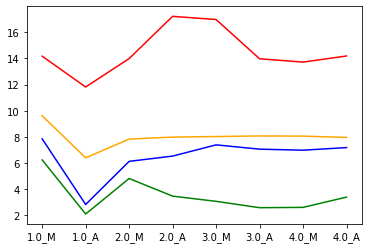

In [179]:
a0 = plotEmo(0, False, 'joy')
a1 = plotEmo(1, False, 'joy')
a2 = plotEmo(2, False, 'joy')
a3 = plotEmo(3, False, 'joy')

p0 = pd.DataFrame(a0, columns=movieColumns)
p1 = pd.DataFrame(a1, columns=movieColumns)
p2 = pd.DataFrame(a2, columns=movieColumns)
p3 = pd.DataFrame(a3, columns=movieColumns)

p0.mean().plot(kind='line', color='blue')
p1.mean().plot(kind='line', color='orange')
p2.mean().plot(kind='line', color='red')
p3.mean().plot(kind='line', color='green')



<AxesSubplot:>

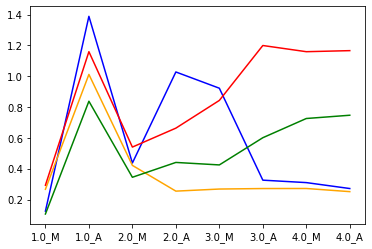

In [180]:
a0 = plotEmo(0, False, 'sadness')
a1 = plotEmo(1, False, 'sadness')
a2 = plotEmo(2, False, 'sadness')
a3 = plotEmo(3, False, 'sadness')

p0 = pd.DataFrame(a0, columns=movieColumns)
p1 = pd.DataFrame(a1, columns=movieColumns)
p2 = pd.DataFrame(a2, columns=movieColumns)
p3 = pd.DataFrame(a3, columns=movieColumns)

p0.mean().plot(kind='line', color='blue')
p1.mean().plot(kind='line', color='orange')
p2.mean().plot(kind='line', color='red')
p3.mean().plot(kind='line', color='green')


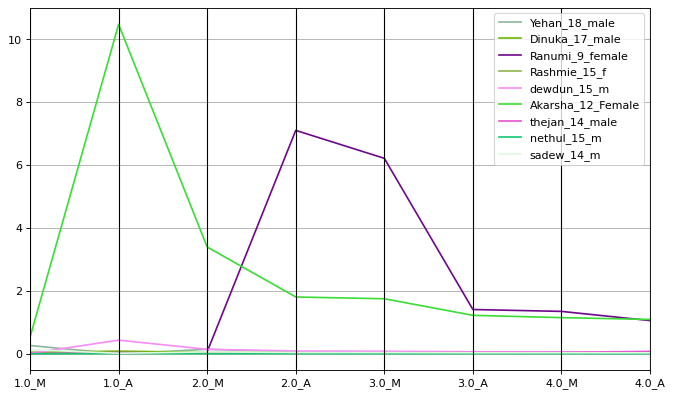

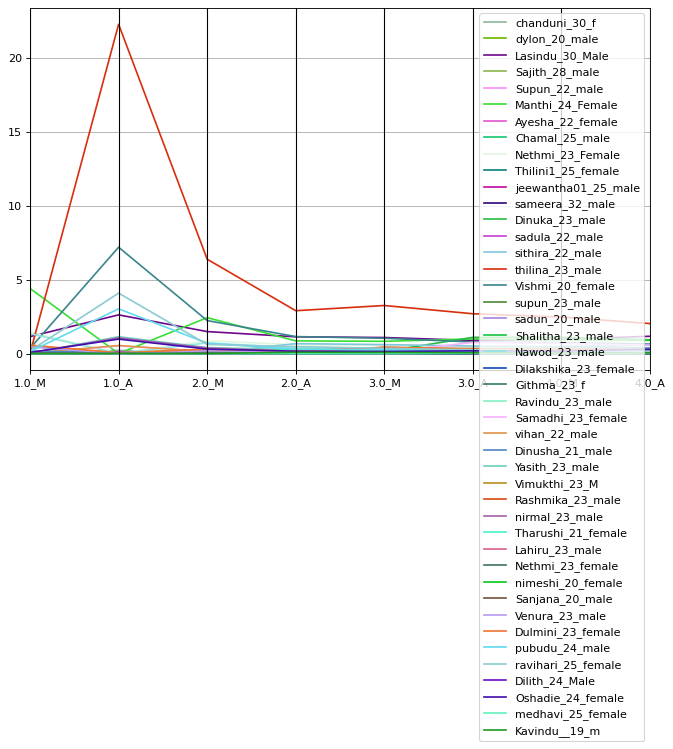

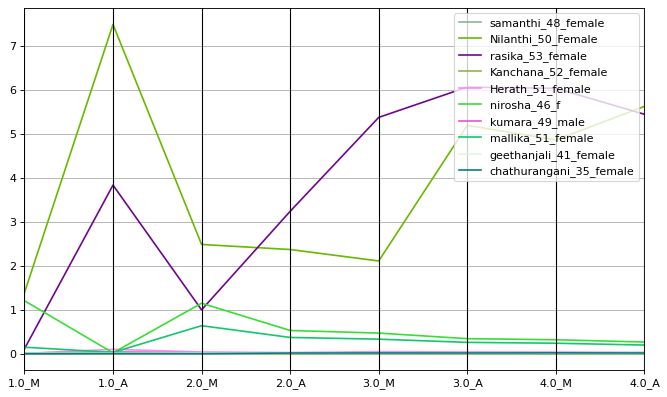

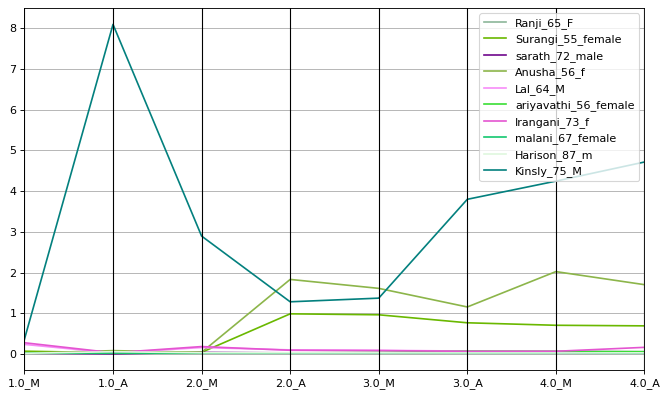

In [167]:
plotEmo(0, True, 'sadness')
plotEmo(1, True, 'sadness')
plotEmo(2, True, 'sadness')
plotEmo(3, True, 'sadness')


In [ ]:
# what are the emotions that contributes a lot for recommending ads
above question is incorrect because we cannot argue that the likability of the ad depends on the emotions triggered while watching the movie part

# find the most suitable ad for each user, gender wise, age wise
# find the most suitable ad for each user based on the previous emotions
# find the most suitable ad for each user based on the previous facial features

# the most dominant emotions for particular age groups while watching ads
# the most dominant facial features for particular age groups while watching ads
# the most dominant emotions for particular gender while watching ads
# the most dominant facial features for particular gender while watching ads

# emotions that contribues a lot for recommending ads gender wise
# facial features contributes a lot for recommending ads gender wise

# tags
# 1st ad = tikiri mari, => children, busicuts, eating, age 5-18, message deliver
# 2nd ad = boc => elders, investment, boc, tutorial
# 3rd ad = cream cracker => young adults, adults, busicuts, family, love 
# 4th ad = maggi => young adults, music, fun, colorful, food, eating

# find the most likable and hated ad for each user



In [39]:
# finding the most liked and hated ad
moviePartsWithAge = pd.read_csv('meanOfMovieWithAge.csv')

In [40]:
moviePartsWithAge.loc[moviePartsWithAge['userId'] == 'Lahiru_23_male']

,Unnamed: 0,Unnamed: 0.1,smile,innerBrowRaise,browRaise,browFurrow,noseWrinkle,upperLipRaise,lipCornerDepressor,chinRaise,...,anger,fear,surprise,valence,engagement,timestamp,userId,num,part,age
0,0,mean,0.944980,0.007321,12.931460,0.000247,0.001265,6.469341,2.508669,3.186199,...,0.037459,0.076230,4.207244,-5.051303,15.784402,36.196418,Lahiru_23_male,1.0,M,1
1,1,mean,0.000223,0.001590,12.212350,0.000247,0.003044,0.917955,4.922062,6.981729,...,0.390009,0.003132,4.062983,-7.817432,14.007696,82.014279,Lahiru_23_male,1.0,A,1
2,2,mean,0.585185,0.005256,12.794181,0.000236,0.001991,4.346483,3.189683,4.299268,...,0.152735,0.048412,4.056534,-5.722758,14.642886,49.798928,Lahiru_23_male,2.0,M,1
3,3,mean,0.250589,0.252834,10.394885,0.007487,0.077309,2.349885,9.574063,3.080715,...,0.088650,0.226062,3.796687,-7.349686,13.669061,115.964499,Lahiru_23_male,2.0,A,1
4,4,mean,0.224445,0.237248,11.080581,0.117665,0.073010,2.119239,12.559441,2.798391,...,0.094116,0.202612,4.322070,-9.253248,15.385725,129.701614,Lahiru_23_male,3.0,M,1
5,5,mean,2.009563,0.185200,11.330839,0.084009,0.055128,2.136273,14.387203,2.673038,...,0.076611,0.144169,3.665013,-8.220958,17.396636,184.123915,Lahiru_23_male,3.0,A,1
6,6,mean,6.595376,0.170446,10.475908,0.077316,0.051068,2.951739,13.332749,2.535868,...,0.071339,0.132743,3.669115,-2.989107,22.005073,200.334350,Lahiru_23_male,4.0,M,1
7,7,mean,5.527062,0.170824,9.908801,0.064805,0.043436,2.566737,16.759428,2.217050,...,0.062985,0.111668,3.218508,-5.853229,21.800915,240.565510,Lahiru_23_male,4.0,A,1


In [41]:
# creating favAd dataframe
moviePartsWithAge.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'smile', 'innerBrowRaise', 'browRaise',
       'browFurrow', 'noseWrinkle', 'upperLipRaise', 'lipCornerDepressor',
       'chinRaise', 'lipPucker', 'lipPress', 'lipSuck', 'mouthOpen', 'smirk',
       'eyeClosure', 'attention', 'lidTighten', 'jawDrop', 'dimpler',
       'eyeWiden', 'cheekRaise', 'lipStretch', 'joy', 'sadness', 'disgust',
       'contempt', 'anger', 'fear', 'surprise', 'valence', 'engagement',
       'timestamp', 'userId', 'num', 'part', 'age'],
      dtype='object')

In [27]:
usernames = set(list(movieParts['userId']))

In [42]:
# favAd = pd.read_csv('favAd.csv')
favAd = pd.read_csv('favAd_with_all_emotions.csv')

In [ ]:
favAd = pd.read_csv('favAd.csv')

In [50]:
set(favAd['ad'].values)

{0.0, 1.0, 2.0, 3.0}

In [52]:
favUsers = list(favAd['userId'].values)

In [53]:
favAd['age'] = -1
favAd['gender'] = -1

In [44]:
for i, row in favAd.iterrows():
#     print(row['userId'])
#     print(row['userId'])
    age = moviePartsWithAge.loc[moviePartsWithAge['userId'] == row['userId']]['age'].values[0]
    favAd.loc[favAd['userId'] == row['userId'], 'age'] = age
    gender = timelines.loc[timelines['UserId'] == row['userId']]['Gender'].values[0].lower()
    if 'female' == gender:
        favAd.loc[favAd['userId'] == row['userId'], 'gender'] = 0
    else:
        favAd.loc[favAd['userId'] == row['userId'], 'gender'] = 1
#     print(favAd.loc[moviePartsWithAge.loc[moviePartsWithAge['userId'] == row['userId']]['age'].values[0]])
#     favAd.loc[favAd['userId'] == row['userId'], 'age'] = 
#     break

In [52]:
set(moviePartsWithAge['age'].values)

{0, 1, 2, 3}

In [48]:
# building classifiers and ml dl models
from sklearn.ensemble import RandomForestClassifier
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np

from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv3D, MaxPooling3D, Dropout, SpatialDropout3D,LeakyReLU
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score

import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
# from sklearn.metrics import 
import plotly.express as px

In [54]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [91]:
favAd = pd.read_csv('favAd.csv')

In [92]:
x = favAd.drop(['userId', 'ad'], axis=1)
x = np.asarray(x.values, dtype=int)
y = np.asarray(favAd['ad'].values, dtype=int)

In [93]:
favAd.head()

,userId,ad,age,gender
0,vihan_22_male,0.0,1,1
1,Rashmika_23_male,0.0,1,1
2,dylon_20_male,0.0,1,1
3,geethanjali_41_female,1.0,2,0
4,Sajith_28_male,0.0,1,1


In [32]:
df = favAd.drop(['userId'], axis=1)

In [35]:
df = df.reindex(['gender', 'age', 'ad'], axis=1)

In [36]:
# age, gender and ad preference
# import plotly.express as px
fig = px.parallel_coordinates(df, color="ad", labels={"ad": "ad",
                "age": "age", "gender": "gender"},
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)
fig.show()

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
# x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.4, random_state=0)

In [24]:
print(x_train.shape)
print(x_test.shape)

(53, 2)
(24, 2)


In [25]:
# gender and age groups
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[11  0  0  0]
 [ 3  1  0  0]
 [ 2  1  1  0]
 [ 4  0  1  0]]
Accuracy0.5416666666666666


In [26]:
print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1', 'class 2', 'class 3']))

              precision    recall  f1-score   support

     class 0       0.55      1.00      0.71        11
     class 1       0.50      0.25      0.33         4
     class 2       0.50      0.25      0.33         4
     class 3       0.00      0.00      0.00         5

    accuracy                           0.54        24
   macro avg       0.39      0.38      0.34        24
weighted avg       0.42      0.54      0.44        24



/home/hicup/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
from sklearn import svm

clf = svm.SVC()
clf.fit(x_train, y_train)
svmPredict = clf.predict(x_test)
cm = confusion_matrix(y_test, svmPredict)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, svmPredict)))
print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1', 'class 2', 'class 3']))

[[11  0  0  0]
 [ 4  0  0  0]
 [ 3  0  1  0]
 [ 4  0  1  0]]
Accuracy0.5
              precision    recall  f1-score   support

     class 0       0.55      1.00      0.71        11
     class 1       0.50      0.25      0.33         4
     class 2       0.50      0.25      0.33         4
     class 3       0.00      0.00      0.00         5

    accuracy                           0.54        24
   macro avg       0.39      0.38      0.34        24
weighted avg       0.42      0.54      0.44        24



/home/hicup/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
x = favAd.drop(['userId', 'ad'], axis=1)
x = np.asarray(x.values, dtype=int)
y = np.asarray(favAd['ad'].values, dtype=int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.4, random_state=0)


In [29]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

print(38/(38+16+23))
print(16/(38+16+23))
print(23/(38+16+23))


(38, 2)
(16, 2)
(23, 2)
(38,)
(16,)
(23,)
0.4935064935064935
0.2077922077922078
0.2987012987012987


In [133]:
patience = 50;
learning_rate = 0.0001
batch_size = 32
epochs = 500

In [31]:
y_test = to_categorical(y_test).astype(np.int32)
y_train = to_categorical(y_train).astype(np.int32)
y_val = to_categorical(y_val).astype(np.int32)
def create_model():
    model = Sequential()
    model.add(Dense(100, input_dim=2))
    model.add(LeakyReLU())
    model.add(Dense(50))
    model.add(LeakyReLU())
    model.add(Dense(25))
    model.add(LeakyReLU())
    model.add(Dense(10))
    model.add(LeakyReLU())
    model.add(Dense(4, activation='softmax'))
    # Compile model
#     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()
visualizer = tf.keras.callbacks.TensorBoard(log_dir='./timestamps_age_gender/')
earlystops = tf.keras.callbacks.EarlyStopping(patience=patience, restore_best_weights=True, verbose=1)


# Compile the model
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

# Fit data to model
history = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            validation_data=(x_val, y_val),
            callbacks=[visualizer, earlystops])

Epoch 1/500
2/2 [==============================] - 1s 159ms/step - loss: 0.7123 - accuracy: 0.1398 - val_loss: 0.7099 - val_accuracy: 0.1875
Epoch 2/500
2/2 [==============================] - 0s 30ms/step - loss: 0.7103 - accuracy: 0.1294 - val_loss: 0.7072 - val_accuracy: 0.1875
Epoch 3/500
2/2 [==============================] - 0s 31ms/step - loss: 0.7079 - accuracy: 0.1294 - val_loss: 0.7044 - val_accuracy: 0.1875
Epoch 4/500
2/2 [==============================] - 0s 31ms/step - loss: 0.7056 - accuracy: 0.1190 - val_loss: 0.7018 - val_accuracy: 0.1875
Epoch 5/500
2/2 [==============================] - 0s 29ms/step - loss: 0.7025 - accuracy: 0.1398 - val_loss: 0.6991 - val_accuracy: 0.1875
Epoch 6/500
2/2 [==============================] - 0s 29ms/step - loss: 0.6999 - accuracy: 0.1398 - val_loss: 0.6964 - val_accuracy: 0.1875
Epoch 7/500
2/2 [==============================] - 0s 29ms/step - loss: 0.6986 - accuracy: 0.1190 - val_loss: 0.6937 - val_accuracy: 0.1875
Epoch 8/500
2/2 [==

2/2 [==============================] - 0s 28ms/step - loss: 0.5651 - accuracy: 0.4825 - val_loss: 0.5251 - val_accuracy: 0.5625
Epoch 118/500
2/2 [==============================] - 0s 29ms/step - loss: 0.5641 - accuracy: 0.4720 - val_loss: 0.5241 - val_accuracy: 0.5625
Epoch 119/500
2/2 [==============================] - 0s 29ms/step - loss: 0.5605 - accuracy: 0.4929 - val_loss: 0.5232 - val_accuracy: 0.5625
Epoch 120/500
2/2 [==============================] - 0s 26ms/step - loss: 0.5649 - accuracy: 0.4720 - val_loss: 0.5224 - val_accuracy: 0.5625
Epoch 121/500
2/2 [==============================] - 0s 31ms/step - loss: 0.5609 - accuracy: 0.4825 - val_loss: 0.5216 - val_accuracy: 0.5625
Epoch 122/500
2/2 [==============================] - 0s 26ms/step - loss: 0.5574 - accuracy: 0.4929 - val_loss: 0.5210 - val_accuracy: 0.5625
Epoch 123/500
2/2 [==============================] - 0s 30ms/step - loss: 0.5617 - accuracy: 0.4720 - val_loss: 0.5204 - val_accuracy: 0.5625
Epoch 124/500
2/2 [=

Epoch 175/500
2/2 [==============================] - 0s 28ms/step - loss: 0.5453 - accuracy: 0.4720 - val_loss: 0.5033 - val_accuracy: 0.5625
Epoch 176/500
2/2 [==============================] - 0s 28ms/step - loss: 0.5409 - accuracy: 0.4825 - val_loss: 0.5031 - val_accuracy: 0.5625
Epoch 177/500
2/2 [==============================] - 0s 28ms/step - loss: 0.5445 - accuracy: 0.4720 - val_loss: 0.5030 - val_accuracy: 0.5625
Epoch 178/500
2/2 [==============================] - 0s 30ms/step - loss: 0.5441 - accuracy: 0.4720 - val_loss: 0.5028 - val_accuracy: 0.5625
Epoch 179/500
2/2 [==============================] - 0s 30ms/step - loss: 0.5476 - accuracy: 0.4616 - val_loss: 0.5025 - val_accuracy: 0.5625
Epoch 180/500
2/2 [==============================] - 0s 31ms/step - loss: 0.5435 - accuracy: 0.4720 - val_loss: 0.5021 - val_accuracy: 0.5625
Epoch 181/500
2/2 [==============================] - 0s 29ms/step - loss: 0.5391 - accuracy: 0.4825 - val_loss: 0.5018 - val_accuracy: 0.5625
Epoch 

Epoch 233/500
2/2 [==============================] - 0s 33ms/step - loss: 0.5276 - accuracy: 0.4825 - val_loss: 0.4919 - val_accuracy: 0.5625
Epoch 234/500
2/2 [==============================] - 0s 29ms/step - loss: 0.5322 - accuracy: 0.4720 - val_loss: 0.4920 - val_accuracy: 0.5625
Epoch 235/500
2/2 [==============================] - 0s 28ms/step - loss: 0.5381 - accuracy: 0.4616 - val_loss: 0.4921 - val_accuracy: 0.5625
Epoch 236/500
2/2 [==============================] - 0s 28ms/step - loss: 0.5365 - accuracy: 0.4616 - val_loss: 0.4920 - val_accuracy: 0.5625
Epoch 237/500
2/2 [==============================] - 0s 28ms/step - loss: 0.5483 - accuracy: 0.4408 - val_loss: 0.4918 - val_accuracy: 0.5625
Epoch 238/500
2/2 [==============================] - 0s 29ms/step - loss: 0.5303 - accuracy: 0.4825 - val_loss: 0.4916 - val_accuracy: 0.5625
Epoch 239/500
2/2 [==============================] - 0s 29ms/step - loss: 0.5367 - accuracy: 0.4720 - val_loss: 0.4914 - val_accuracy: 0.5625
Epoch 

Epoch 291/500
2/2 [==============================] - 0s 29ms/step - loss: 0.5225 - accuracy: 0.4825 - val_loss: 0.4972 - val_accuracy: 0.5625
Epoch 292/500
2/2 [==============================] - 0s 33ms/step - loss: 0.5233 - accuracy: 0.4825 - val_loss: 0.4976 - val_accuracy: 0.5625
Restoring model weights from the end of the best epoch.
Epoch 00292: early stopping


In [32]:

# y_pred

In [33]:
predict = model.predict(x_test)
y_pred = np.argmax(predict, axis=1)
y_test = np.argmax(y_test, axis=1)
print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1', 'class 2', 'class 3']))

              precision    recall  f1-score   support

     class 0       0.52      1.00      0.69        12
     class 1       0.00      0.00      0.00         2
     class 2       0.00      0.00      0.00         4
     class 3       0.00      0.00      0.00         5

    accuracy                           0.52        23
   macro avg       0.13      0.25      0.17        23
weighted avg       0.27      0.52      0.36        23



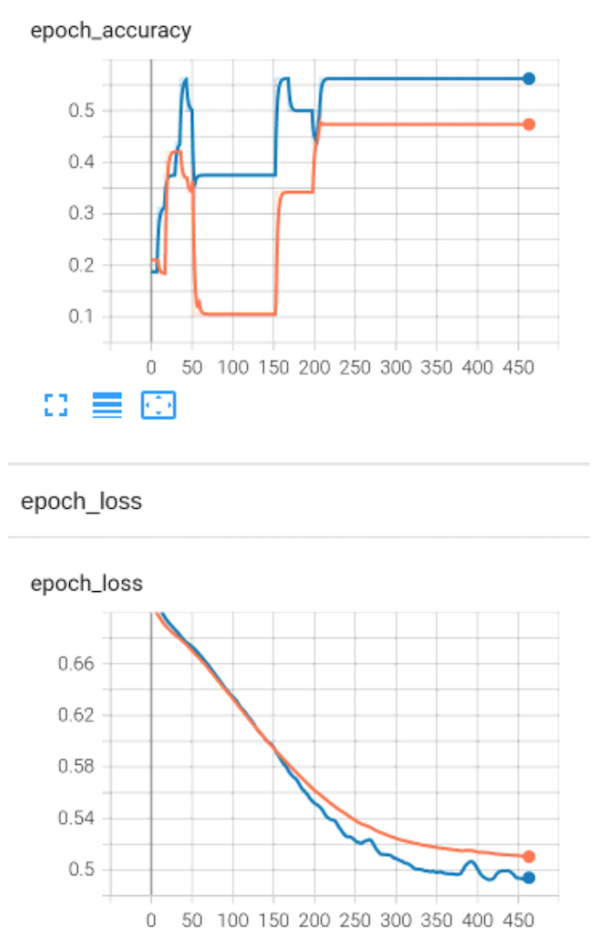

In [19]:
from IPython.display import Image
Image(filename='trainingLogs/age_gender.png')


In [46]:
model.save('./models/age_gender.h5')